## Generating Friedman1 dataset

In [5]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import make_friedman1
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
def generate_friedman1(n_samples=10000, n_features=5, noise=0.0, random_state=42):
    '''
    Function to generate dataset according to Friedman1.
    Inputs:
        n_samples: number of data points
        n_features: number of features (have to be at least 5)
        noise: The standard deviation of the gaussian noise applied to the output.
        random_state: to repreoduce dataset
    Outputs:
        features: array
        y: array

    '''
    features, y = sklearn.datasets.make_friedman1(n_samples=n_samples, 
                                                  n_features=n_features, 
                                                  noise=noise, 
                                                  random_state=random_state)
    return (features, y)


In [7]:
features, y = generate_friedman1()
features

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
       [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
       [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
       ...,
       [0.44278322, 0.57820664, 0.46877158, 0.14188158, 0.74118443],
       [0.53303816, 0.39932288, 0.5596385 , 0.24122695, 0.42795772],
       [0.6224452 , 0.22619357, 0.74899508, 0.52101091, 0.86170671]])

In [8]:
y

array([16.83826156, 12.51782504,  5.86968919, ..., 12.34777254,
       10.8228707 , 15.03893816])

Just some try with transforming target variable. Wouldnt do it.

array([[<Axes: title={'center': 'y_transformed'}>]], dtype=object)

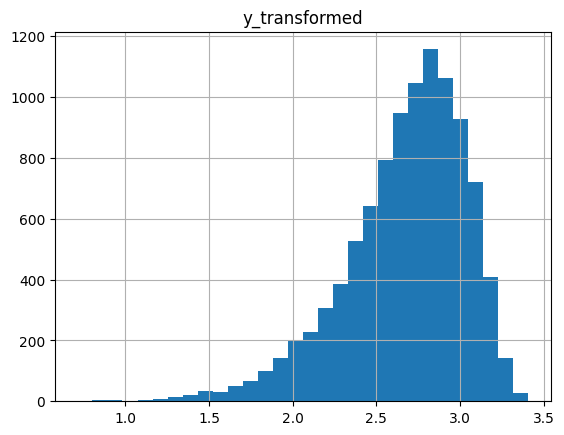

In [59]:
# Apply logarithmic transformation to make the target variable distribution more symmetric
y_transformed = np.log1p(y)

# Create a DataFrame
df = pd.DataFrame(data=np.c_[features, y_transformed], columns=[f'X{i}' for i in range(1, features.shape[1] + 1)] + ['y_transformed'])

# Visualize the distribution
df.hist(column='y_transformed', bins=30)

In [9]:
def to_dataframe(features, y):
    ''' 
    Function to convert arrays to combined dataframe of X and y. (could also add normalization?)
    Inputs: 
        features: first output from generate_friedman1
        y: second output from generate_friedman1
    Output:
        combined dataframe
    '''
    features=pd.DataFrame(features, 
                            columns=[f'X{i}' for i in range(1, features.shape[1] + 1)])
    y=pd.DataFrame(y, 
                     columns=['y'])
    
    df=pd.concat([features, y], axis=1)
    return df


In [10]:
df=to_dataframe(features=features, y=y)
df

,X1,X2,X3,X4,X5,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,16.838262
1,0.155995,0.058084,0.866176,0.601115,0.708073,12.517825
2,0.020584,0.969910,0.832443,0.212339,0.181825,5.869689
3,0.183405,0.304242,0.524756,0.431945,0.291229,7.531879
4,0.611853,0.139494,0.292145,0.366362,0.456070,9.457372
...,...,...,...,...,...,...
9995,0.532481,0.550056,0.984144,0.599966,0.666627,21.977669
9996,0.213723,0.106865,0.602010,0.864880,0.587373,12.510693
9997,0.442783,0.578207,0.468772,0.141882,0.741184,12.347773
9998,0.533038,0.399323,0.559639,0.241227,0.427958,10.822871


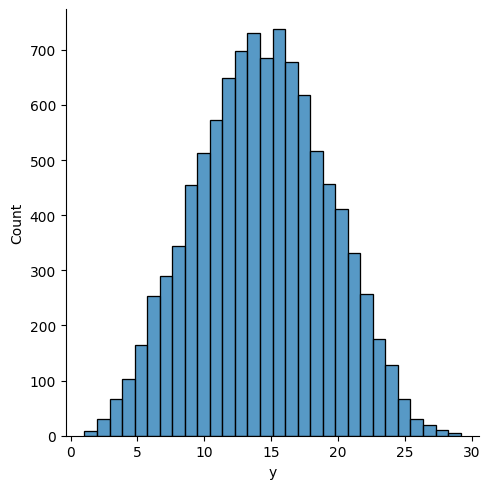

In [11]:
sns.displot(df, x='y', bins = 30)

In [12]:
def plot_data_3D(df, axes=['X1', 'X2', 'X3']):

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(df['X1'], df['X2'], df['X3'], c=df['y'], cmap='viridis', marker='o')

    ax.set_xlabel(axes[0])
    ax.set_ylabel(axes[1])
    ax.set_zlabel(axes[2])
    ax.set_title(f'3D Scatter Plot of {axes[0]}, {axes[1]} and {axes[2]}')

    plt.show()

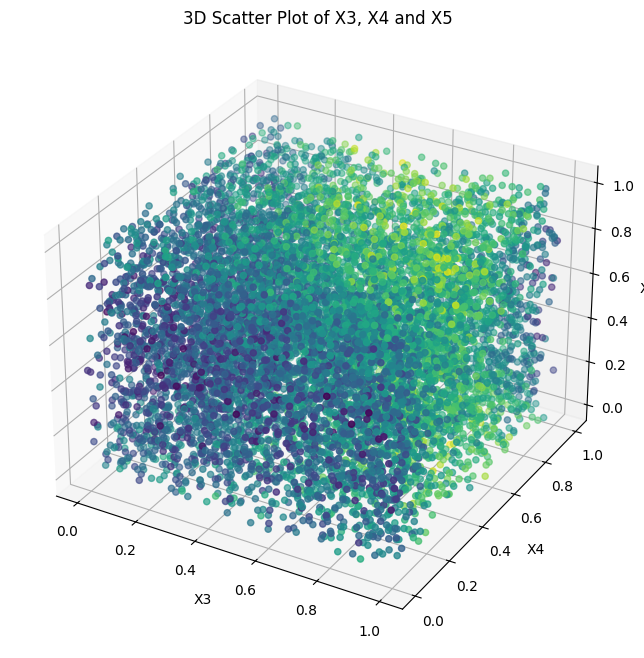

In [13]:
plot_data_3D(df, ['X3', 'X4','X5'])

#### What if we add noise??

In [53]:
features_noise, y_noise = generate_friedman1(noise=10)

In [54]:
df_noise=to_dataframe(features_noise, y_noise)

In [55]:
df_noise

,X1,X2,X3,X4,X5,y
0,0.374540,0.950714,0.731994,0.598658,0.156019,16.647628
1,0.155995,0.058084,0.866176,0.601115,0.708073,24.590708
2,0.020584,0.969910,0.832443,0.212339,0.181825,12.122614
3,0.183405,0.304242,0.524756,0.431945,0.291229,-0.515011
4,0.611853,0.139494,0.292145,0.366362,0.456070,27.328506
...,...,...,...,...,...,...
9995,0.532481,0.550056,0.984144,0.599966,0.666627,28.648759
9996,0.213723,0.106865,0.602010,0.864880,0.587373,8.005824
9997,0.442783,0.578207,0.468772,0.141882,0.741184,29.699039
9998,0.533038,0.399323,0.559639,0.241227,0.427958,-1.211299


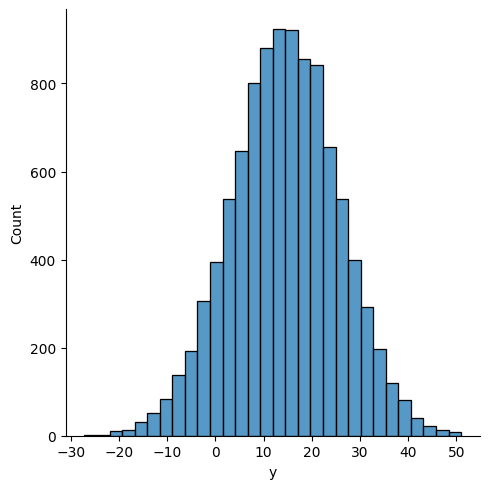

In [67]:
sns.displot(df_noise, x='y', bins = 30)

-> It doesn't really make it imbalanced, but standard deviation becomes larger.

## First try with Random Forest, without stratification, 5-fold cv, random search

In [27]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [17]:
# first devide data in train/test data (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[: , :-1], df['y'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [25]:
# Define the parameter grid for random search
param_rf = {
    'n_estimators': np.arange(500, 1001),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'max_features': np.arange(1, X_train.shape[1] + 1)
}

In [21]:
# Initialize Random Forest model
rf_model=RandomForestRegressor(random_state=42)
                            

In [28]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_rf,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)


In [29]:
# Perform the random search on the training set
random_search.fit(X_train, y_train)

# Display the best parameters found by random search
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 882, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': 4}


In [30]:
# Display the cross-validated score with the best parameters
best_score = random_search.best_score_
print(f"\nBest Cross-Validated Mean Squared Error: {best_score:.4f}")



Best Cross-Validated Mean Squared Error: -1.5476


In [33]:
# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
train_score=best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
print(f"Train Set R^2 Score: {train_score:.4f} \nTest Set R^2 Score: {test_score:.4f}")

Train Set R^2 Score: 0.9671 
Test Set R^2 Score: 0.9341
